### Введение

Это продолжение предыдущей части работы, я продолжаю работать с датасетом, сформированным под ВКР. За время, прошедшее с первого этапа датасет увеличен со 172 до 251 респондента, данные в анализе обновлены.

Данный набор данных собран мной в рамках пилотного исследования для магистерской диссертации. В рамках исследования уже проведен теоретический обзор, на основе теоретического обзора отобраны исследуемые конструкты и операционализирована анкета, после чего проведен пилотный сбор данных (N=251). Здесь будут представлены результаты пилотного эмпирического исследования и анализ анкеты. Часть переменных перекодированы в числа, часть намеренно сохранены в текстовом виде для создания категориальных переменных. Предварительно анкета закодирована для удобства работы, декодировка анкеты представлена в Приложении внизу.

#### В данной работе не будут рассмотрены следующие не релевантные для формата исследования операции:
1. Z оценка и выбросы.
2. Стандартизация переменных (используется 5-балльная шкала Лайкерта).
3. Работа с пропусками данных, так как в датасете для диссертации отсутствуют пропуски.

#### В данной работе будут рассмотрены:
1. Описательные статистики.
2. Факторный анализ.
3. Моделирование структурными уравнениями (Srtuctural Equation Modeling, SEM).


### 1. Подготовка и осмотр датасета

На данном этапе подготовим необходимые пакеты и загрузим датасет, ознакомимся с количеством столбцов и т.д.

In [1]:
#загрузим библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None) #покажем все колонки

In [2]:
#загрузим файл

df=pd.read_excel('251_resp.xlsx')
deciph=pd.read_excel('deciph.xlsx') #подгрузим расшифровку переменных

In [3]:
pd.set_option('display.max_rows', None) #сделаем чтобы отображались все строки (нужно для расшифровки переменных)

#так как вопросы длинные, добавим возможность выводить весь текст ячеек чтобы описать переменные
pd.options.display.max_colwidth = 1000 

In [4]:
#изучим размеры датасета

df.shape

(251, 139)

In [5]:
#посмотрим датасет

df.head(3)

,time,Q1,Q2,Q3,Q4,Q5_1,Q5_2,Q5_3,Q6_1,Q6_2,Q6_3,Q7_1,Q7_2,Q7_3,Q7_4,Q8_1,Q8_2,Q8_3,Q8_4,Q9_1,Q9_2,Q9_3,Q9_4,Q10_1,Q10_2,Q10_3,Q10_4,Q10_5,Q10_6,Q11_1,Q11_2,Q11_3,Q11_4,Q11_5,Q11_6,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q12_7,Q12_8,Q12_9,Q13,Q14_1,Q14_2,Q14_3,Q15_1,Q15_2,Q15_3,Q15_4,Q16_1,Q16_2,Q16_3,Q16_4,Q16_5,Q17_1,Q17_2,Q17_3,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q18_1,Q18_2,Q18_3,Q18_4,Q19_1,Q19_2,Q19_3,Q19_4,Q20_1,Q20_2,Q20_3,Q20_4,Q20_5,Q20_6,Q21_1,Q21_2,Q21_3,Q21_4,Q21_5,Q21_6,Q22_1,Q22_2,Q22_3,Q22_4,Q23_1,Q23_2,Q23_3,Q24_1,Q24_2,Q24_3,Q24_4,Q24_5,Q25_1,Q25_2,Q25_3,Q25_4,Q26_1,Q26_2,Q26_3,Q27_1,Q27_2,Q27_3,Q28_1,Q28_2,Q29_1,Q29_2,Q29_3,Q29_4,Q29_5,Q29_6,Q29_7,Q29_8,Q29_9,Q29_10,Q29_11,Q29_12,Q29_13,Q29_14,Q29_15,Q29_16,Q29_17,Q29_18,Q29_19,Q29_20,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37
0,2022-09-03 17:28:18.339,Часто,Смартфон,"Для общения, Для образования, расширения кругозора, развития своего ума, Для работы",Скорее доверяю,2,4,3,4,4,5,2,1,1,2,1,4,4,4,4,4,4,4,4,4,4,5,5,4,4,5,4,4,4,4,4,4,3,2,3,4,4,4,4,Сервис доставки еды,4,3,5,2,1,1,2,3,2,4,4,4,4,4,3,3,4,4,4,2,2,2,3,4,4,5,5,5,5,5,4,5,5,5,5,5,5,5,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,3,5,4,5,4,3,2,4,2,2,2,2,5,5,5,1,5,1,1,5,5,1,5,5,2,5,2,5,2,5,5,2,мужской,18-25,Высшее образование,"Покупка большинства товаров длительного пользования (холодильник, телевизор) не вызывает трудностей, однако купить автомобиль мы не можем",Холост (не замужем),Нет,Больше 1 млн.,г. Москва
1,2022-09-03 18:31:53.127,Часто,Смартфон,"Для образования, расширения кругозора, развития своего ума, Для работы, Чтобы расслабиться, отдохнуть, приятно провести время",Не имею определенного отношения,2,2,3,3,4,5,2,2,2,3,1,3,4,2,3,4,3,4,4,3,4,4,4,4,4,4,2,3,3,2,3,3,3,4,4,4,4,2,2,Стриминговый сервис,4,3,4,2,3,2,3,2,3,3,5,4,2,2,3,3,3,3,2,3,2,2,3,3,2,3,2,3,3,3,3,2,2,2,3,2,3,4,3,3,4,4,2,4,4,2,4,4,4,4,3,2,3,2,4,4,3,4,1,2,3,4,2,3,3,2,2,3,3,2,4,2,2,2,3,2,4,4,2,3,2,2,2,4,2,2,женский,18-25,Высшее образование,"Покупка большинства товаров длительного пользования (холодильник, телевизор) не вызывает трудностей, однако купить автомобиль мы не можем",Холост (не замужем),Нет,100-500 тыс.,г. Химки
2,2022-09-03 19:18:01.035,Часто,Персональный компьютер / ноутбук,"Для общения, Для образования, расширения кругозора, развития своего ума, Для работы",Скорее доверяю,3,3,3,3,4,4,2,1,1,3,3,4,5,3,3,3,3,3,4,4,4,4,4,5,5,5,4,4,5,5,3,3,3,3,4,4,4,4,2,Интернет-магазин,4,3,4,2,1,1,2,1,1,3,3,3,3,3,3,4,4,4,4,1,1,1,4,4,3,4,4,4,4,4,4,4,4,4,5,5,5,5,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,5,3,5,3,3,3,4,4,3,3,3,5,5,4,4,3,2,2,3,3,2,3,3,4,3,1,4,3,4,4,3,женский,18-25,Высшее образование,"Денег достаточно для приобретения необходимых продуктов и одежды, на более крупные покупки приходится откладывать",Холост (не замужем),Нет,Больше 1 млн.,г. Москва


### 2. Описание выборки и демография

Как видно, датасет включает ответы 172 респондента и 139 столбцов ответов. В целом, весьма большой датасет, но нам нет необходимости анализировать все переменные, для этого мы выберем только те, которые необходимы для анализа. Переменные отобраны в соответствии с проведенным ранее теоретическим обзором. Для оценки факторов, формирующих доверие потребителей к онлайн-сервисам, в анкете  использована 5-балльная шкала Лайкерта, где 1 соответствует значению «не согласен», 2 – «скорее не согласен», 3 – «нейтральная позиция», 4 – «скорее согласен», 5 – «согласен». Финальная анкета размещена на платформе «Google Формы». Сбор данных проходил в период с 3 сентября по 16 сентября в рамках тестирования анкеты. Основным методом сбора данных выступил стандартизированный онлайн-опрос, при проведении опроса для распространения анкеты использован метод снежного кома.

In [6]:
#для иизучения демографии удобнее переписать названия столбцов, перепишем

df = df.rename(columns={'Q30': 'Gender', 'Q31': 'Age', 'Q32': 'Education','Q33': 'Income','Q34': 'Marital',
                        'Q35': 'Children','Q36': 'City size','Q37': 'City',})

In [7]:
df.head(3)

,time,Q1,Q2,Q3,Q4,Q5_1,Q5_2,Q5_3,Q6_1,Q6_2,Q6_3,Q7_1,Q7_2,Q7_3,Q7_4,Q8_1,Q8_2,Q8_3,Q8_4,Q9_1,Q9_2,Q9_3,Q9_4,Q10_1,Q10_2,Q10_3,Q10_4,Q10_5,Q10_6,Q11_1,Q11_2,Q11_3,Q11_4,Q11_5,Q11_6,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q12_7,Q12_8,Q12_9,Q13,Q14_1,Q14_2,Q14_3,Q15_1,Q15_2,Q15_3,Q15_4,Q16_1,Q16_2,Q16_3,Q16_4,Q16_5,Q17_1,Q17_2,Q17_3,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q18_1,Q18_2,Q18_3,Q18_4,Q19_1,Q19_2,Q19_3,Q19_4,Q20_1,Q20_2,Q20_3,Q20_4,Q20_5,Q20_6,Q21_1,Q21_2,Q21_3,Q21_4,Q21_5,Q21_6,Q22_1,Q22_2,Q22_3,Q22_4,Q23_1,Q23_2,Q23_3,Q24_1,Q24_2,Q24_3,Q24_4,Q24_5,Q25_1,Q25_2,Q25_3,Q25_4,Q26_1,Q26_2,Q26_3,Q27_1,Q27_2,Q27_3,Q28_1,Q28_2,Q29_1,Q29_2,Q29_3,Q29_4,Q29_5,Q29_6,Q29_7,Q29_8,Q29_9,Q29_10,Q29_11,Q29_12,Q29_13,Q29_14,Q29_15,Q29_16,Q29_17,Q29_18,Q29_19,Q29_20,Gender,Age,Education,Income,Marital,Children,City size,City
0,2022-09-03 17:28:18.339,Часто,Смартфон,"Для общения, Для образования, расширения кругозора, развития своего ума, Для работы",Скорее доверяю,2,4,3,4,4,5,2,1,1,2,1,4,4,4,4,4,4,4,4,4,4,5,5,4,4,5,4,4,4,4,4,4,3,2,3,4,4,4,4,Сервис доставки еды,4,3,5,2,1,1,2,3,2,4,4,4,4,4,3,3,4,4,4,2,2,2,3,4,4,5,5,5,5,5,4,5,5,5,5,5,5,5,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,3,5,4,5,4,3,2,4,2,2,2,2,5,5,5,1,5,1,1,5,5,1,5,5,2,5,2,5,2,5,5,2,мужской,18-25,Высшее образование,"Покупка большинства товаров длительного пользования (холодильник, телевизор) не вызывает трудностей, однако купить автомобиль мы не можем",Холост (не замужем),Нет,Больше 1 млн.,г. Москва
1,2022-09-03 18:31:53.127,Часто,Смартфон,"Для образования, расширения кругозора, развития своего ума, Для работы, Чтобы расслабиться, отдохнуть, приятно провести время",Не имею определенного отношения,2,2,3,3,4,5,2,2,2,3,1,3,4,2,3,4,3,4,4,3,4,4,4,4,4,4,2,3,3,2,3,3,3,4,4,4,4,2,2,Стриминговый сервис,4,3,4,2,3,2,3,2,3,3,5,4,2,2,3,3,3,3,2,3,2,2,3,3,2,3,2,3,3,3,3,2,2,2,3,2,3,4,3,3,4,4,2,4,4,2,4,4,4,4,3,2,3,2,4,4,3,4,1,2,3,4,2,3,3,2,2,3,3,2,4,2,2,2,3,2,4,4,2,3,2,2,2,4,2,2,женский,18-25,Высшее образование,"Покупка большинства товаров длительного пользования (холодильник, телевизор) не вызывает трудностей, однако купить автомобиль мы не можем",Холост (не замужем),Нет,100-500 тыс.,г. Химки
2,2022-09-03 19:18:01.035,Часто,Персональный компьютер / ноутбук,"Для общения, Для образования, расширения кругозора, развития своего ума, Для работы",Скорее доверяю,3,3,3,3,4,4,2,1,1,3,3,4,5,3,3,3,3,3,4,4,4,4,4,5,5,5,4,4,5,5,3,3,3,3,4,4,4,4,2,Интернет-магазин,4,3,4,2,1,1,2,1,1,3,3,3,3,3,3,4,4,4,4,1,1,1,4,4,3,4,4,4,4,4,4,4,4,4,5,5,5,5,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,5,3,5,3,3,3,4,4,3,3,3,5,5,4,4,3,2,2,3,3,2,3,3,4,3,1,4,3,4,4,3,женский,18-25,Высшее образование,"Денег достаточно для приобретения необходимых продуктов и одежды, на более крупные покупки приходится откладывать",Холост (не замужем),Нет,Больше 1 млн.,г. Москва




Теперь давайте посмотрим на распределение переменных по разным параметрам. Для этого сначала мы посчитаем уникальные значения по всем переменным

In [8]:
gendistr = df['Gender'].value_counts()
gendistr

женский    168
мужской     83
Name: Gender, dtype: int64

In [9]:
agedistr = df['Age'].value_counts()
agedistr

18-25        206
26-30         18
36-40          9
До 18          7
31-35          5
51- 60         2
41-50          2
Старше 60      2
Name: Age, dtype: int64

In [10]:
edudistr = df['Education'].value_counts()
edudistr

Высшее образование                               122
Незаконченное высшее образование                  95
Два и более высших                                 9
Среднее общее образование                          8
Среднее специальное образование                    6
Наличие ученой степени кандидата/доктора наук      6
Неполное среднее образование                       5
Name: Education, dtype: int64

In [11]:
incdistr = df['Income'].value_counts()
incdistr

Покупка большинства товаров длительного пользования (холодильник, телевизор) не вызывает трудностей, однако купить автомобиль мы не можем    87
Денег достаточно для приобретения необходимых продуктов и одежды, на более крупные покупки приходится откладывать                            85
Мы можем позволить себе купить автомобиль, однако купить квартиру мы не можем                                                                49
Денег достаточно, чтобы вообще ни в чем себе не отказывать                                                                                   21
Денег хватает только на приобретение продуктов питания                                                                                        6
Денег не хватает даже на приобретение продуктов питания                                                                                       3
Name: Income, dtype: int64

In [12]:
mardistr = df['Marital'].value_counts()
mardistr

Холост (не замужем)                               166
Живем вместе, но официально не состоим в браке     41
Женат (замужем)                                    31
Затрудняюсь ответить                               10
Разведен (разведена)                                1
Вдовец (вдова)                                      1
Живем порознь, но не разведены                      1
Name: Marital, dtype: int64

In [13]:
chilistr = df['Children'].value_counts()
chilistr

Нет    230
Да      21
Name: Children, dtype: int64

Text(0.5, 1.0, 'Распределение респондентов по наличию детей')

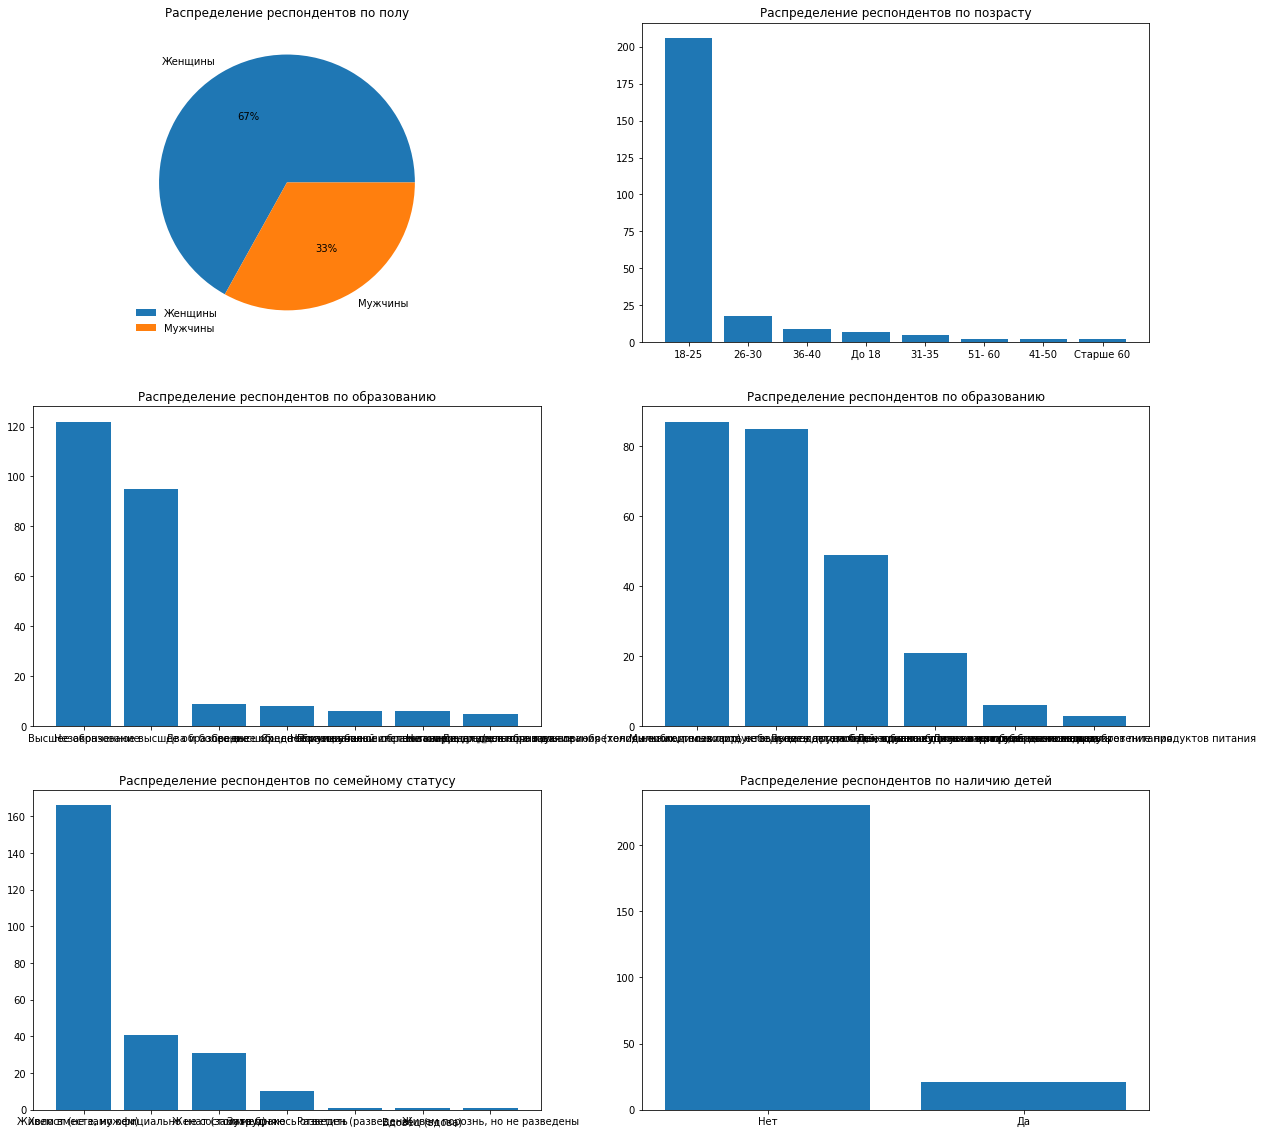

In [14]:
#перейдем к построению графиков, я решил построить 6 штук в одном блоке для наглядности

fig, ax = plt.subplots(3,2, figsize=(20,20))

#Посмотрим распределение респондентов по полу
ax[0][0].pie(gendistr, labels = ['Женщины', 'Мужчины'], autopct='%.0f%%')
ax[0][0].legend(frameon=False)
ax[0][0].set_title('Распределение респондентов по полу')

#Посмотрим распределение респондентов по возрасту
ax[0][1].bar(agedistr.index, agedistr)
ax[0][1].set_title('Распределение респондентов по позрасту')

#Посмотрим распределение респондентов по образованию
ax[1][0].bar(edudistr.index, edudistr)
ax[1][0].set_title('Распределение респондентов по образованию')

#Посмотрим распределение респондентов по доходу
ax[1][1].bar(incdistr.index, incdistr)
ax[1][1].set_title('Распределение респондентов по образованию')

#Посмотрим распределение респондентов по доходу
ax[2][0].bar(mardistr.index, mardistr)
ax[2][0].set_title('Распределение респондентов по семейному статусу')

#Посмотрим распределение респондентов по наличию детей
ax[2][1].bar(chilistr.index, chilistr)
ax[2][1].set_title('Распределение респондентов по наличию детей')

#### Как видно из распределения, выборка является смещенной, но так как целью исследования является анализ поведения молодого поколенияб в целом распределение по возрасту соответвствует целям. Выборка в разрезе пола, семеного статуса, дохода и иных характеристик является смещенной. Так как преимущественно планируется работа с молодым поколением (18-30 лет), то принято решение соответствующим образом отфильтровать выборку.

In [15]:
df_y  = df[((df['Age'] == '18-25') | (df['Age'] == '26-30'))] #отберем респондентов помоложе
df_y['Age'].value_counts() #посмотрим что у нас вышло

18-25    206
26-30     18
Name: Age, dtype: int64

### 3. Отбор переменных для факторного анализа

В исследовании будут использованы переменные из блоков Q5, Q6, Q9. Q10, Q11, Q25, Q26. Переменные из блоков будут использованы для проведения факторного анализа. Для начала проанализируем переменные для выявления корреляции.

In [16]:
#для начала отберем переменные, которые будем анализировать на предмет корреляций и отберем их в отдельный датафрейм

df1 = df_y[['Q5_1', 'Q5_2', 'Q5_3', 'Q6_1', 'Q6_2', 'Q6_3', 'Q9_1','Q9_2', 'Q9_3', 'Q9_4', 'Q10_1', 'Q10_2', 'Q10_3', 'Q10_4',
   'Q10_5', 'Q10_6', 'Q11_1', 'Q11_2', 'Q11_3', 'Q11_4', 'Q11_5', 'Q11_6', 'Q25_1', 'Q25_2', 'Q25_3', 'Q25_4', 'Q26_1',
   'Q26_2', 'Q26_3', 'Q12_3', 'Q12_4','Q12_5']]

In [17]:
#посмотрим что получилось

df1.head()

,Q5_1,Q5_2,Q5_3,Q6_1,Q6_2,Q6_3,Q9_1,Q9_2,Q9_3,Q9_4,Q10_1,Q10_2,Q10_3,Q10_4,Q10_5,Q10_6,Q11_1,Q11_2,Q11_3,Q11_4,Q11_5,Q11_6,Q25_1,Q25_2,Q25_3,Q25_4,Q26_1,Q26_2,Q26_3,Q12_3,Q12_4,Q12_5
0,2,4,3,4,4,5,4,4,4,4,4,4,4,5,5,4,4,5,4,4,4,4,3,5,4,5,4,3,2,3,2,3
1,2,2,3,3,4,5,3,4,3,4,4,3,4,4,4,4,4,4,2,3,3,2,4,4,3,4,1,2,3,3,4,4
2,3,3,3,3,4,4,3,3,3,3,4,4,4,4,4,5,5,5,4,4,5,5,4,5,3,5,3,3,3,3,3,4
3,4,3,2,3,3,5,3,2,3,3,4,5,5,3,5,5,4,4,5,4,4,5,4,5,4,5,2,2,4,3,4,4
4,3,4,3,2,2,4,4,4,3,4,5,5,4,4,3,3,4,4,4,3,5,3,2,3,1,2,3,3,2,3,3,4


In [18]:
df1.shape

(224, 32)

Итого размеры датасета для дальнейшего анализа уменьшились до 152 респондентов. На следующем этапе необходимо изучить полученный датасет и выявить существующие закономерности, так как на следующих этапах алнируется проведение факторного анализа. Факторный анализ необходим для формирования латентных переменных и выявления мультиколлинеарности в переменных

In [19]:
df1.isna().sum()

Q5_1     0
Q5_2     0
Q5_3     0
Q6_1     0
Q6_2     0
Q6_3     0
Q9_1     0
Q9_2     0
Q9_3     0
Q9_4     0
Q10_1    0
Q10_2    0
Q10_3    0
Q10_4    0
Q10_5    0
Q10_6    0
Q11_1    0
Q11_2    0
Q11_3    0
Q11_4    0
Q11_5    0
Q11_6    0
Q25_1    0
Q25_2    0
Q25_3    0
Q25_4    0
Q26_1    0
Q26_2    0
Q26_3    0
Q12_3    0
Q12_4    0
Q12_5    0
dtype: int64

### Как видно из результата, пропущенные значения отсутствуют (все вопросы в анкете были обязательными)

Теперь поработаем с корреляциями и выявим взаимосвязи

In [20]:
correlation = df1.corr()

<AxesSubplot:>

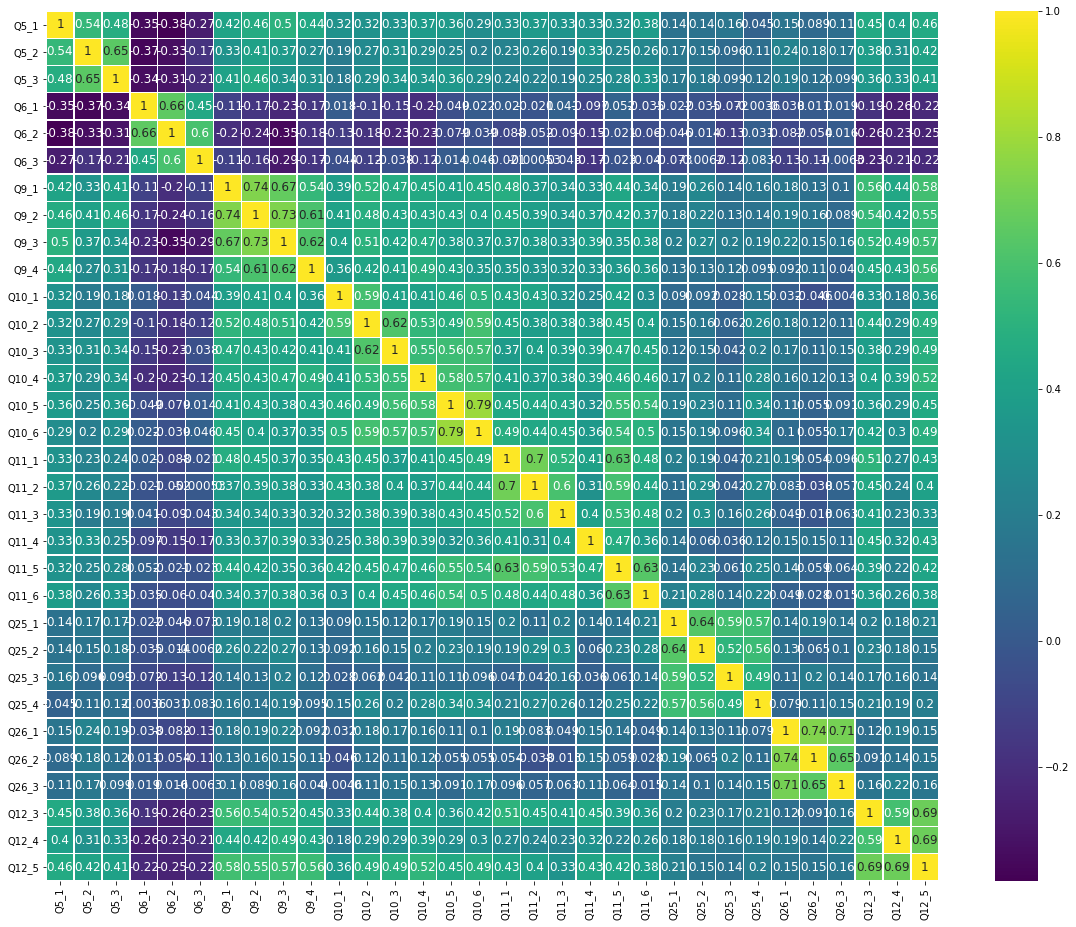

In [21]:
#Построим матрицу корреляция и разукрасим, чтобы не было скучно

fig , ax = plt.subplots(figsize = (20,16))

sns.heatmap(correlation, 
            linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white", annot_kws = {'size':12})

Как видно из полученной матрицы, среди переменных, очевидно, существует связь (что в том числе обусловлено преднамеренным формированием анкеты для дальнейшего моделирования), также это характеризует мультиколлинеарность в данных. Теперь почитаем дисперсию и среднеквадратичное отклонение по выборке.

In [22]:
variables = ['Q5_1', 'Q5_2', 'Q5_3', 'Q6_1', 'Q6_2', 'Q6_3', 'Q9_1','Q9_2', 'Q9_3', 'Q9_4', 'Q10_1', 'Q10_2', 'Q10_3', 'Q10_4',
   'Q10_5', 'Q10_6', 'Q11_1', 'Q11_2', 'Q11_3', 'Q11_4', 'Q11_5', 'Q11_6', 'Q25_1', 'Q25_2', 'Q25_3', 'Q25_4', 'Q26_1',
   'Q26_2', 'Q26_3', 'Q12_3', 'Q12_4','Q12_5']

df1[variables].agg(['mean', 'std', 'var'])

,Q5_1,Q5_2,Q5_3,Q6_1,Q6_2,Q6_3,Q9_1,Q9_2,Q9_3,Q9_4,Q10_1,Q10_2,Q10_3,Q10_4,Q10_5,Q10_6,Q11_1,Q11_2,Q11_3,Q11_4,Q11_5,Q11_6,Q25_1,Q25_2,Q25_3,Q25_4,Q26_1,Q26_2,Q26_3,Q12_3,Q12_4,Q12_5
mean,2.794643,2.660714,2.875000,3.053571,3.236607,3.718750,3.357143,3.187500,2.915179,2.799107,3.450893,3.357143,3.392857,3.383929,3.821429,3.812500,3.629464,3.696429,3.419643,3.183036,3.700893,3.754464,2.745536,3.477679,2.727679,3.415179,2.656250,2.370536,2.625000,3.169643,3.035714,3.316964
std,1.101474,1.096702,1.153081,1.040346,1.121458,1.162341,0.991960,0.942578,0.931242,1.032998,1.095158,1.023115,1.139248,1.077662,1.039267,1.024640,0.975589,0.911701,0.938832,1.027635,0.968008,1.005580,1.168525,1.193947,1.117309,1.175971,1.109541,1.007251,0.998878,0.926814,1.123963,1.029815
var,1.213245,1.202755,1.329596,1.082319,1.257667,1.351037,0.983985,0.888453,0.867213,1.067084,1.199371,1.046765,1.297886,1.161355,1.080077,1.049888,0.951774,0.831198,0.881406,1.056034,0.937040,1.011191,1.365451,1.425508,1.248378,1.382908,1.231082,1.014554,0.997758,0.858985,1.263293,1.060518


### Часть 2 - Факторный анализ и Structural Equation Modeling

Итак, на этом этапе рад представить следующий этап исследования - проведение факторного анализа, что является логичным продолжением предыдущей части. Часть 2 будет состоять из двух частей: факторный анализ для выявления факторной структуры и моделирование структурными уравнениями.

In [23]:
#импортируем нужные библиотеки
import semopy 
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [24]:
df1.head() #посмотрим еще раз на колонки датасета

,Q5_1,Q5_2,Q5_3,Q6_1,Q6_2,Q6_3,Q9_1,Q9_2,Q9_3,Q9_4,Q10_1,Q10_2,Q10_3,Q10_4,Q10_5,Q10_6,Q11_1,Q11_2,Q11_3,Q11_4,Q11_5,Q11_6,Q25_1,Q25_2,Q25_3,Q25_4,Q26_1,Q26_2,Q26_3,Q12_3,Q12_4,Q12_5
0,2,4,3,4,4,5,4,4,4,4,4,4,4,5,5,4,4,5,4,4,4,4,3,5,4,5,4,3,2,3,2,3
1,2,2,3,3,4,5,3,4,3,4,4,3,4,4,4,4,4,4,2,3,3,2,4,4,3,4,1,2,3,3,4,4
2,3,3,3,3,4,4,3,3,3,3,4,4,4,4,4,5,5,5,4,4,5,5,4,5,3,5,3,3,3,3,3,4
3,4,3,2,3,3,5,3,2,3,3,4,5,5,3,5,5,4,4,5,4,4,5,4,5,4,5,2,2,4,3,4,4
4,3,4,3,2,2,4,4,4,3,4,5,5,4,4,3,3,4,4,4,3,5,3,2,3,1,2,3,3,2,3,3,4


На следующем этапе для проверки данных на возможность проведения факторного анализа следует проверить выборку и отобранные переменные на возможность проведения факторного анализа, для этого необходимо провести тест Бартлетта и тест Кайзера-Мейера-Олкина

In [25]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df1)
chi_square_value, p_value

(4187.457274450952, 0.0)

Значимость критерия Бартлетта меньше 0,05 указывает, что данные приемлемы для проведения факторного анализа

In [26]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df1)

C:\Users\tunke\anaconda3\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [27]:
kmo_model

0.8924490335296372

Критерий КМО находится между 0,8 и 9,9 - это говорит о высокой адекватности анализируемой выборки

In [28]:
kmo_all

array([0.94234474, 0.87722236, 0.89646271, 0.77240541, 0.7435672 ,
       0.76354439, 0.92886336, 0.93358583, 0.91110894, 0.94311837,
       0.91681366, 0.91852889, 0.92867972, 0.97240674, 0.9023804 ,
       0.89895064, 0.87326232, 0.86246696, 0.92958003, 0.91334899,
       0.92595613, 0.91944445, 0.76565523, 0.79843978, 0.83758832,
       0.84165609, 0.71202145, 0.71778067, 0.75040886, 0.93846771,
       0.90912468, 0.92613831])

Оба теста показывают результаты, позволяющие проведение факторного анализа (хорошее р-значение у критерия Бартлетта и КМО)

In [29]:
fa = FactorAnalyzer(rotation = 'varimax')
fa.fit(df1)

ev, v = fa.get_eigenvalues()
ev

array([10.43573298,  2.93232578,  2.63606032,  2.07485543,  1.32546212,
        1.23035361,  1.11661177,  0.97690656,  0.81577672,  0.73953626,
        0.65143519,  0.60652137,  0.54242479,  0.50908842,  0.47513724,
        0.45830185,  0.42126011,  0.40515372,  0.37287127,  0.35462967,
        0.33932995,  0.33193537,  0.31089049,  0.29631031,  0.28441059,
        0.25890958,  0.23203848,  0.20841191,  0.19196814,  0.17371576,
        0.15081552,  0.1408187 ])

Text(0, 0.5, 'Собственные значения')

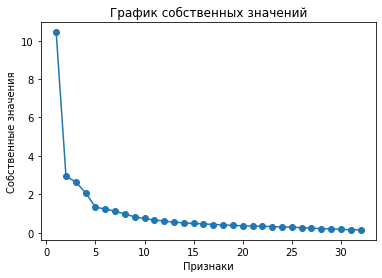

In [30]:
plt.scatter(range(1, df1.shape[1] + 1), ev)
plt.plot(range(1, df1.shape[1] + 1), ev)

plt.title('График собственных значений')
plt.xlabel('Признаки')
plt.ylabel('Собственные значения')

Результаты выше показывают, что для анализа необходимо использовать 8 факторов (eigenval > 1). Но при этом результаты факторного анализа в SPSS и теоретическая концептуализация показывают, что здесь больше подойдёт использование 7 факторов, поэтоу будем использовать именно 7

In [31]:
fa = FactorAnalyzer (n_factors = 8, rotation = 'varimax')
fa.fit(df1)

FactorAnalyzer(n_factors=8, rotation='varimax', rotation_kwargs={})

In [32]:
loadings = fa.loadings_

Проверим матрицу нагрузок

In [33]:
loadmatrix = pd.DataFrame.from_records(loadings, index = df1.columns, columns= ['F1','F2','F3','F4','F5','F6','F7', 'F8'])
loadmatrix

,F1,F2,F3,F4,F5,F6,F7,F8
Q5_1,0.176829,0.280256,0.280678,0.049884,0.048650,-0.317236,0.194361,0.413544
Q5_2,0.107894,0.164411,0.155150,0.061835,0.144122,-0.228218,0.144586,0.698741
Q5_3,0.214586,0.102353,0.192082,0.085484,0.071215,-0.190281,0.112881,0.704468
Q6_1,-0.049975,0.095110,-0.013520,-0.019363,0.044255,0.673813,-0.124309,-0.294312
Q6_2,-0.098085,-0.018724,-0.112663,-0.011818,-0.002841,0.889222,-0.026110,-0.125597
Q6_3,0.052800,-0.033068,-0.118319,-0.011809,-0.066588,0.653728,-0.104610,-0.026181
Q9_1,0.295113,0.240962,0.654561,0.109324,0.068514,-0.042803,0.226424,0.171536
Q9_2,0.248058,0.236729,0.748767,0.086393,0.071035,-0.088942,0.152339,0.254042
Q9_3,0.261284,0.208397,0.679798,0.152307,0.110970,-0.259857,0.218143,0.101379
Q9_4,0.310401,0.187290,0.525294,0.040345,0.009588,-0.115264,0.270242,0.122596


Как видим, пока не очень интерпретируемо, поэтому попробуем еще обработать до лучшей читабельности и заменим значения с небольшими нагрузками на NaN

In [34]:
loadmatrix1 = loadmatrix.where(loadmatrix > 0.4, np.nan)
loadmatrix1

,F1,F2,F3,F4,F5,F6,F7,F8
Q5_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.413544
Q5_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.698741
Q5_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.704468
Q6_1,NaN,NaN,NaN,NaN,NaN,0.673813,NaN,NaN
Q6_2,NaN,NaN,NaN,NaN,NaN,0.889222,NaN,NaN
Q6_3,NaN,NaN,NaN,NaN,NaN,0.653728,NaN,NaN
Q9_1,NaN,NaN,0.654561,NaN,NaN,NaN,NaN,NaN
Q9_2,NaN,NaN,0.748767,NaN,NaN,NaN,NaN,NaN
Q9_3,NaN,NaN,0.679798,NaN,NaN,NaN,NaN,NaN
Q9_4,NaN,NaN,0.525294,NaN,NaN,NaN,NaN,NaN


Как мы видим, в переменных Q11_5, Q11_6 наблюдается перекрестная нагрузка, поэтому нужно ее удалить из анализа, поэтому проведем анализ еще раз без этой переменной. Также в следующих итерациях удалится переменная Q11_4. Удалим переменные и повторим всю процедуру анализа

In [35]:
df2 = df1.drop(df1.columns[[19,20,21]], axis=1)

df2

,Q5_1,Q5_2,Q5_3,Q6_1,Q6_2,Q6_3,Q9_1,Q9_2,Q9_3,Q9_4,Q10_1,Q10_2,Q10_3,Q10_4,Q10_5,Q10_6,Q11_1,Q11_2,Q11_3,Q25_1,Q25_2,Q25_3,Q25_4,Q26_1,Q26_2,Q26_3,Q12_3,Q12_4,Q12_5
0,2,4,3,4,4,5,4,4,4,4,4,4,4,5,5,4,4,5,4,3,5,4,5,4,3,2,3,2,3
1,2,2,3,3,4,5,3,4,3,4,4,3,4,4,4,4,4,4,2,4,4,3,4,1,2,3,3,4,4
2,3,3,3,3,4,4,3,3,3,3,4,4,4,4,4,5,5,5,4,4,5,3,5,3,3,3,3,3,4
3,4,3,2,3,3,5,3,2,3,3,4,5,5,3,5,5,4,4,5,4,5,4,5,2,2,4,3,4,4
4,3,4,3,2,2,4,4,4,3,4,5,5,4,4,3,3,4,4,4,2,3,1,2,3,3,2,3,3,4
5,2,1,1,4,5,5,1,1,1,1,1,1,1,3,4,4,3,3,3,1,1,1,1,1,1,1,1,1,1
6,2,1,2,3,3,2,4,2,3,3,4,5,4,3,3,4,3,2,2,5,3,3,3,3,3,2,3,2,3
7,5,5,5,2,2,2,2,2,2,2,3,3,3,3,3,2,3,3,3,4,4,4,4,3,3,3,3,3,3
8,2,3,2,3,5,4,4,3,3,4,4,3,2,3,5,5,4,4,4,4,5,1,5,1,1,3,3,4,3
9,3,3,3,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,1,2,2,2,2,2,2,4,4,4


In [36]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df2)
chi_square_value, p_value

(3743.0257432649805, 0.0)

In [37]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df2)

In [38]:
kmo_model

0.8830609517599946

In [39]:
kmo_all

array([0.93795823, 0.87245649, 0.89239065, 0.76520429, 0.757678  ,
       0.77314257, 0.93791283, 0.92584613, 0.91850643, 0.93903126,
       0.91171997, 0.90826206, 0.92807661, 0.96726815, 0.88590994,
       0.88244903, 0.85698266, 0.83623459, 0.92577796, 0.76559486,
       0.79349381, 0.83527843, 0.844175  , 0.70932638, 0.7278759 ,
       0.75304481, 0.93714198, 0.90468625, 0.92118424])

In [40]:
fa = FactorAnalyzer(rotation = 'varimax')
fa.fit(df2)

ev, v = fa.get_eigenvalues()
ev

array([9.36127338, 2.74754308, 2.62434217, 2.05252661, 1.27969187,
       1.15416853, 1.10073987, 0.95384858, 0.69335435, 0.64857502,
       0.57806472, 0.547093  , 0.50974073, 0.47593755, 0.43647003,
       0.40813047, 0.36768985, 0.35728105, 0.34897538, 0.33488096,
       0.30703341, 0.29025814, 0.2635163 , 0.24680045, 0.22814671,
       0.19552683, 0.17985157, 0.16044484, 0.14809455])

Как видим, по текущим значениям нам больше подойдет 7 факторов, поэтому можно повторить предыдущие операции

Text(0, 0.5, 'Собственные значения')

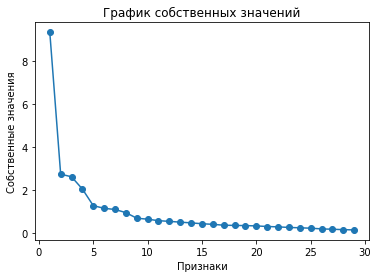

In [41]:
plt.scatter(range(1, df2.shape[1] + 1), ev)
plt.plot(range(1, df2.shape[1] + 1), ev)

plt.title('График собственных значений')
plt.xlabel('Признаки')
plt.ylabel('Собственные значения')

In [42]:
fa = FactorAnalyzer (n_factors = 8, rotation = 'varimax')
fa.fit(df2)

FactorAnalyzer(n_factors=8, rotation='varimax', rotation_kwargs={})

In [43]:
loadings = fa.loadings_

In [44]:
loadmatrix = pd.DataFrame.from_records(loadings, index = df2.columns, columns= ['F1','F2','F3','F4','F5','F6','F7','F8'])
loadmatrix1 = loadmatrix.where(loadmatrix > 0.4, np.nan)
loadmatrix1

,F1,F2,F3,F4,F5,F6,F7,F8
Q5_1,NaN,NaN,NaN,NaN,NaN,NaN,0.416875,NaN
Q5_2,NaN,NaN,NaN,NaN,NaN,NaN,0.734707,NaN
Q5_3,NaN,NaN,NaN,NaN,NaN,NaN,0.690741,NaN
Q6_1,NaN,NaN,NaN,NaN,0.674716,NaN,NaN,NaN
Q6_2,NaN,NaN,NaN,NaN,0.886933,NaN,NaN,NaN
Q6_3,NaN,NaN,NaN,NaN,0.656389,NaN,NaN,NaN
Q9_1,NaN,0.649458,NaN,NaN,NaN,NaN,NaN,NaN
Q9_2,NaN,0.748144,NaN,NaN,NaN,NaN,NaN,NaN
Q9_3,NaN,0.681208,NaN,NaN,NaN,NaN,NaN,NaN
Q9_4,NaN,0.534766,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
pd.DataFrame(fa.get_factor_variance())

,0,1,2,3,4,5,6,7
0,3.946489,2.642756,2.405571,2.209588,2.102268,1.960213,1.641990,1.636012
1,0.136086,0.091130,0.082951,0.076193,0.072492,0.067594,0.056620,0.056414
2,0.136086,0.227215,0.310166,0.386359,0.458851,0.526444,0.583065,0.639479


Матрица компонентов сверху уже читабельна, но давайте подшаманим ее до идеала

In [46]:
loadmatrix2 = loadmatrix1.sort_values(['F1','F2','F3','F4','F5','F6','F7', 'F8'], ascending=False)

In [47]:
loadmatrix2

,F1,F2,F3,F4,F5,F6,F7,F8
Q10_6,0.817482,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q10_5,0.754786,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q10_3,0.650797,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q10_2,0.642653,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q10_4,0.618758,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q10_1,0.526859,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q9_2,NaN,0.748144,NaN,NaN,NaN,NaN,NaN,NaN
Q9_3,NaN,0.681208,NaN,NaN,NaN,NaN,NaN,NaN
Q9_1,NaN,0.649458,NaN,NaN,NaN,NaN,NaN,NaN
Q9_4,NaN,0.534766,NaN,NaN,NaN,NaN,NaN,NaN


Text(104.09375, 0.5, 'Диапазон')

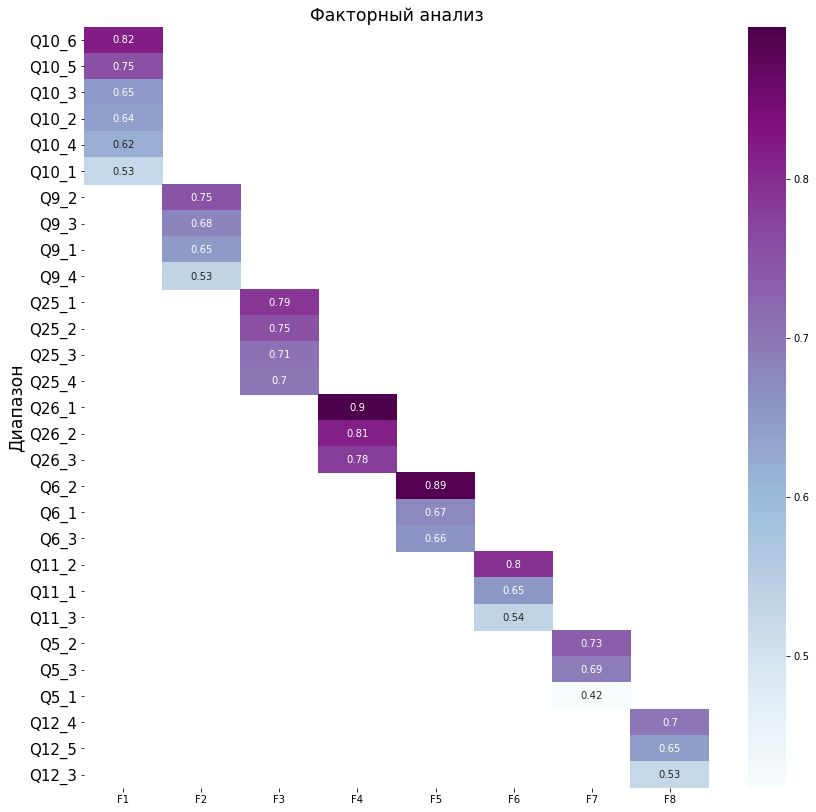

In [48]:
plt.figure(figsize = (14,14))
ax = sns.heatmap(loadmatrix2, annot = True, cmap = 'BuPu')

ax.yaxis.set_tick_params(labelsize = 15)
plt.title('Факторный анализ', fontsize = 'xx-large')

plt.ylabel('Диапазон', fontsize = 'xx-large')

Давайте теперь почитаем что у нас получилось и посмотрим на интерпретируемость факторов. Расшифровка индикаторов представлена ниже.

In [49]:
deciph.iloc[[23,23,25,26,27,28, 19,20,21,22,99,100,101,102,29,30,32,103,104,105,8,9,10,5,6,7,37,38,39]]

,Код,Расшифровка
23,Q10_1,"10. Насколько Вы согласны с данными утверждениями о доброжелательности онлайн-сервисов и их сотрудников по отношению к клиентам? [Я думаю, что советы и рекомендации, приведенные в онлайн-сервисах, предоставляются в поисках взаимной выгоды]"
23,Q10_1,"10. Насколько Вы согласны с данными утверждениями о доброжелательности онлайн-сервисов и их сотрудников по отношению к клиентам? [Я думаю, что советы и рекомендации, приведенные в онлайн-сервисах, предоставляются в поисках взаимной выгоды]"
25,Q10_3,"10. Насколько Вы согласны с данными утверждениями о доброжелательности онлайн-сервисов и их сотрудников по отношению к клиентам? [Я думаю, что представители онлайн-сервисов учитывают последствия, которые их действия могут иметь для потребителя]"
26,Q10_4,"10. Насколько Вы согласны с данными утверждениями о доброжелательности онлайн-сервисов и их сотрудников по отношению к клиентам? [Я думаю, что онлайн-сервисы не будут делать ничего преднамеренного, что могло бы нанести ущерб пользователю]"
27,Q10_5,"10. Насколько Вы согласны с данными утверждениями о доброжелательности онлайн-сервисов и их сотрудников по отношению к клиентам? [Я считаю, что дизайн и предложение онлайн-сервисов учитывают желания и потребности пользователей]"
28,Q10_6,"10. Насколько Вы согласны с данными утверждениями о доброжелательности онлайн-сервисов и их сотрудников по отношению к клиентам? [Я думаю, что онлайн-сервисы восприимчивы к потребностям своих пользователей]"
19,Q9_1,"9. Насколько Вы согласны с данными утверждениями о честности онлайн-сервисов и их сотрудников? [Я считаю, что онлайн-сервисы обычно выполняют обязательства, которые взяли на себя]"
20,Q9_2,"9. Насколько Вы согласны с данными утверждениями о честности онлайн-сервисов и их сотрудников? [Я считаю, что информация, предоставляемая онлайн-сервисами правдива]"
21,Q9_3,"9. Насколько Вы согласны с данными утверждениями о честности онлайн-сервисов и их сотрудников? [Я думаю, что могу верить обещаниям онлайн-сервисов]"
22,Q9_4,9. Насколько Вы согласны с данными утверждениями о честности онлайн-сервисов и их сотрудников? [Обычно онлайн сервисы не делают ложных заявлений]


### Выводы факторного анализа

Итак, в результате анализа выявлены 8 факторов: 
1. Доброжелательность сервиса
2. Честность сервиса
3. Склонность потребителя к доверию
4. Компетентность сервиса
5. Воспринимаемая эффективность регуляторной деятельности государства
6. Небезовасность проведения банковских платежей
7. Безопасность
8. Доверие к сервису

Полученные факторы на следующем этапе исследования будут использованы для проведения моделирования структурными уравнениями. Переменные 1-7 будут использованы как независимые переменные, переменная 8 - зависимая.

### Structural Equation Modeling

In [50]:
from semopy import Model

Построим модель на основе теоретического обзора

In [95]:
mod = """ benevolence =~ Q10_1 + Q10_2 + Q10_3 + Q10_4 + Q10_5 + Q10_6
          honesty =~ Q9_1 + Q9_2 + Q9_3 + Q9_4
          inclin_trust =~ Q25_1 + Q25_2 + Q25_3 + Q25_4
          competence =~ Q11_1 + Q11_2 + Q11_3
          regulation =~ Q26_1 + Q26_2 + Q26_3
          bank_unsaf =~ Q6_1 + Q6_2 + Q6_3
          safety =~ Q5_1 + Q5_2 + Q5_3
          trust =~ Q12_3 + Q12_4 + Q12_5
          
          company_level =~ benevolence + honesty + competence + bank_unsaf + safety
          
          company_level ~ inclin_trust + regulation
          
          trust ~ company_level
      """

Обучим модель

In [96]:
model = Model(mod)
model.fit(df2)

SolverResult(fun=2.8983299489375494, success=True, n_it=59, x=array([ 1.11845357,  1.23344766,  1.15201608,  1.24203781,  1.26376937,
        1.00555959,  0.95589216,  0.89659228,  0.96185611,  0.80331754,
        0.8632288 ,  0.97420662,  0.8022152 ,  0.82607316,  0.78515013,
        1.44310325,  1.01590233,  1.11376116,  1.13773535,  1.13559941,
        1.26261941,  1.3514019 ,  1.03591324, -0.48237346,  1.04992976,
        0.17301135,  0.09597344,  1.19141069,  0.22856307,  0.46476202,
        0.56914902,  0.28949737,  0.13892602,  0.47097459,  0.45778595,
        0.227851  ,  0.20450357,  0.52945418,  0.56817354,  0.79857929,
        0.4735775 ,  0.25768791,  0.21425374,  0.6007141 ,  0.32106878,
        0.31942708,  0.55313804,  0.37873218,  0.55178959,  0.1493333 ,
        0.69145598,  0.61143143,  0.37420171,  0.31581056,  0.15458765,
        0.7395882 ,  0.32968602,  0.31671706,  0.54796246,  0.23524092,
        0.3332247 ,  0.17639855,  0.43969017,  0.64938591,  0.99703936,
  

Оценим результаты моделиорвания

In [97]:
model.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,benevolence,~,company_level,1.000000,-,-,-
1,honesty,~,company_level,1.351402,0.175263,7.71072,1.24345e-14
2,competence,~,company_level,1.035913,0.154525,6.70383,2.0302e-11
3,bank_unsaf,~,company_level,-0.482373,0.120072,-4.01737,5.88501e-05
4,safety,~,company_level,1.049930,0.164355,6.38818,1.67867e-10
5,company_level,~,inclin_trust,0.173011,0.0460595,3.75626,0.000172472
6,company_level,~,regulation,0.095973,0.0402034,2.38719,0.0169775
7,trust,~,company_level,1.191411,0.159515,7.46897,8.08242e-14
8,Q10_1,~,benevolence,1.000000,-,-,-
9,Q10_2,~,benevolence,1.118454,0.124638,8.9736,0


In [98]:
semopy.calc_stats(model)

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,368,406,649.225909,0.0,3945.589549,0.920548,0.835455,0.818464,0.835455,0.912344,0.05854,128.20334,356.783626,2.89833


Полученные коэффициенты в целом свидетельствуют о достаточно неплохом качестве модели: 
1. Хорошая значимость хи-квадрата - 0
2. Значения GFI	и AGFI меньше 0,95 и 0,9 соответственно
3. Значение NFI меньше 0,85
4. CFI ~ 0,9, но по этому критерию модель стоит улучшить
5. Значение RMSEA < 0,8

In [99]:
import os
os.environ["PATH"] += os.pathsep + r'D:\Graphviz\bin'

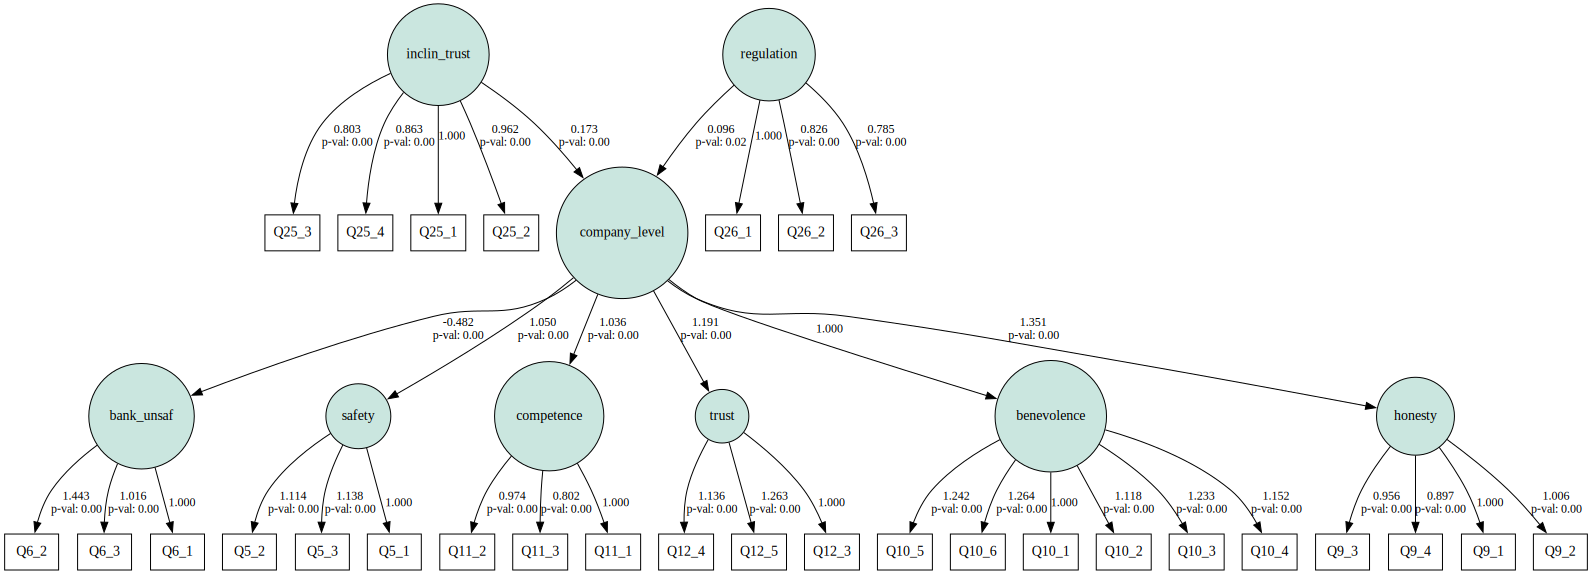

In [102]:
g = semopy.semplot(model,  "pd.png")
g

Как показывают результаты исследования влияния разных факторов на личностном, регуляторном и уровне компании на доверие потребителей к сервисам, можно утверждать, что отобранные факторы имеют влияние на доверие. Такие факторы, как безопасность сервиса для потребителя, компетентность сервиса,доброжелательность и честность сервиса положительно влияют на доверие потребителей на уровне компании, при этом воспинимаемая безопасность введения данных в интернете негативно сказывается на доверии на уровне компании.

Также стоит отметить, Что склонность потребителей к доверию и воспринимаемая эффективность регуляторной деятельности государства также положительно сказываются на довери на уровне компани.

Полученная агрегированная переменная положительно влияет на доверие пользователей к сервису.

### Приложение

In [281]:
deciph #выведем приложение с анкетой

,Код,Расшифровка
0,time,Отметка времени
1,Q1,"1. Оцените, насколько активно Вы пользуетесь интернетом (шкала от 1 до 5, где 1 – редко, 5 – часто, 3 – затрудняюсь ответить)."
2,Q2,2. Какое устройство Вы чаще всего используете для доступа в интернет?
3,Q3,3. Для каких целей вы чаще всего используете интернет? Назовите не больше трех целей
4,Q4,"4. Оцените, пожалуйста, насколько Вы доверяете информации (отзывам и оценкам) потребителей о компаниях/брендах/продуктах в интернете (на форумах, в социальных сетях, на сайтах компаний, специализированных порталах и др.)?"
5,Q5_1,"5. Насколько Вы согласны с данными утверждениями о безопасности онлайн-сервисов? [В интернете достаточно гарантий безопасности, чтобы чувствовать себя комфортно при использовании онлайн-сервисов]"
6,Q5_2,5. Насколько Вы согласны с данными утверждениями о безопасности онлайн-сервисов? [Правовые и технологические системы защищают меня от мошенничества при использовании онлайн-сервисов]
7,Q5_3,"5. Насколько Вы согласны с данными утверждениями о безопасности онлайн-сервисов? [Я уверен(-на), что шифрование данных и другие технологии интернета для обеспечения безопасности делают использование онлайн-сервисов безопасными]"
8,Q6_1,6. Согласны ли Вы с данными утверждениями о безопасности ввода данных при использовании онлайн-сервисов? [Введение данных банковских карт в онлайн-сервисах небезопасно]
9,Q6_2,6. Согласны ли Вы с данными утверждениями о безопасности ввода данных при использовании онлайн-сервисов? [Введение персональных данных в онлайн-сервисах небезопасно]
